In [1]:
# Importando Bibliotecas
# Importando Bibliotecas
from math import pi, sqrt, cosh, sinh
import matplotlib.pyplot as plt
import numpy as np

# APS 1 - Transferência de Calor e Mecânica dos Sólidos

#### Integrantes:
- Davi Reis
- Francisco Janela
- Nicolas Queiroga

### Roteiro de Atividade:

**1.** Aplique os conceitos do **método das diferenças finitas** na equação diferencial do problema para definir 
uma equação de diferença algébrica associada aos nós da aleta. Considere para a segunda derivada da 
temperatura no espaço uma equação de `diferença finita centrada` e para a primeira derivada no tempo 
da temperatura uma equação de `diferença progressiva`. Apresente o desenvolvimento das equações.


- O problema se trata de condução unidimensional, com condutividade térmica constante e sem geração de energia no interior do corpo, e a equação diferencial é dada por:

$$\frac{\partial^2 T}{\partial x^2}-\frac{hP}{kA_{tr}}(T-T_{\infty})=\frac{1}{\alpha} \cdot \frac{\partial T}{\partial t} $$
$$\:$$

- Para a segunda derivada no espaço, usamos a diferença finita centrada:

$$\frac{\partial^2 T}{\partial x^2}=\frac{T_{i+1}-2 \cdot T_{i}+T_{i-1}}{\Delta x^{2}}$$
$$\:$$

- E para representar a derivada no tempo, usamos a diferença progressiva:

$$\frac{\partial T}{\partial t}=\frac{T_{i}^{\; l+1} - \; T_{i}^{\; l} }{\Delta T}$$
$$\:$$


- Juntando as equações e manipulando a equação resultante, temos:

$$\frac{\rho \cdot C_{p}}{k} \cdot \frac{T_{l + 1,  i} - T_{l, i}}{\Delta t} = \left [ \frac{T_{l, i+1}-2 \cdot T_{l,  i} + T_{l, i - 1}}{\Delta x^{2}} \right ]-\left [ \frac{hP}{kA_{tr}} \cdot (T_{l, i} - T_{l, i - 1})\right ]$$

$$\frac{T_{l + 1,  i} - T_{l, i}}{\Delta t}=\frac{k}{\rho \cdot C_{p}} \cdot \left [ \frac{T_{l, i+1}-2 \cdot T_{l,  i} + T_{l, i - 1}}{\Delta x^{2}} - \frac{hP}{kA_{tr}} \cdot (T_{l, i} - T_{l, i - 1})\right ]$$

$$T_{l + 1,  i}=T_{l, i} + \frac{k \; \Delta t}{\rho \cdot C_{p}} \cdot \left [ \frac{T_{l, i+1}-2 \cdot T_{l,  i} + T_{l, i - 1}}{\Delta x^{2}} - \frac{hP}{kA_{tr}} \cdot (T_{l, i} - T_{l, i - 1})\right ]$$



**2.** Apresente  um  gráfico  (𝑇𝑒𝑚𝑝𝑒𝑟𝑎𝑡𝑢𝑟𝑎×𝑝𝑜𝑠𝑖çã𝑜)  após  obter  o  regime  permanente.  Use  uma tolerância de 𝑡𝑜𝑙=1e-10. Considere que a aleta, de comprimento 𝐿=300𝑚𝑚 , densidade de 2700 𝑘𝑔/𝑚³,  condutividade  térmica  de 180 𝑊(𝑚𝐾) e  calor  específico 896 𝐽/(𝑘𝑔𝐾), tem  a temperatura especificada na extremidade de 𝑇(𝐿)=25°C. A aleta está em contato com uma base a Tb = 100°C em um ambiente a Tinf = 50°C e h = 50𝑊/𝑚2𝐾. Para a condição de estabilidade do procedimento numérico use:
*equação de delta_T*


Vamos começar com uma análise exploratória para os cálculos e entender como funcionam as iterações antes de criar a função para gerar o gráfico desejado.

Para isso, definimos o raio da nossa aleta sendo 3mm, pois assim, devido ao seu raio ser bem menor que seu comprimento, podemos adotar a resolução unidimensional.

- Declrando as variáveis:

In [2]:
# Tolerância:
tol = 1e-10

# Comprimento:
L = 300e-3        # 300 mm

# Raio da aleta:
r = 3e-3          # 3 mm

# Densidade:
ro = 2700         # kg/m3

# Condutividade térmica:
k = 180           # W/mK

# Coeficiente de transferência de calor por convecção natural
h = 50            # W/m2K

# Calor específico:
c = 896           # J/kgK

# Temperatura da base:
Tb = 100          # °C

# Temperatura na extremidade:
TL = 25           # °C

# Temperatura ambiente:
Tinf = 50         # °C


## DADOS DO MODELO NUMÉRICO:

# Variação em x:
delta_x = 1e-3    # m

# Tempo de Simulação inicial:
tempo = 1000      # s

- Alguns sub cálculos de variáveis secundárias:

Para o calcular o $\Delta t$, utilizamos a inequação a seguir: 
$$\Delta t≤\frac{\Delta\ x^{2}}{\alpha \cdot(\frac{hP\Delta\ x^{2}}{k\ A_{tr}}) + 2}$$
Para garantir que $\Delta t$ seja **menor**, usamos `0.9` (90%) do valor calculado pela parte da direita da equação.

In [3]:
# Perímetro:
P = 2 * pi * r    # m

# Área de sessão transversal:
Atr = pi * r**2   # m2

# Número de divisões do tamanho da aleta:
n = int(L / delta_x) + 1


## VALORES TEMPORAIS:

# Variação mínima temporal:
delta_t = (delta_x**2 / ((k / (ro * c)) * (h * P * delta_x**2 / (k * Atr) + 2))) * 0.9  # "*0.9" para ser menor que o valor calculado

# número de iterações no tempo determinado espaçadas por um delta t:
passos = len(np.arange(0, tempo, delta_t))


- Gerando a matriz tempo por temperatura em x:

In [4]:
# Gerando a matriz com as condições de temperatura expecificadas
TM = np.zeros((passos, n))

TM[:, 0] = Tb
TM[:, n - 1] = TL

- Realizando as iterações no tempo:

In [5]:
# Inicializando o erro
erro = 1 

# Inicializando a variável para guardar a ultima iteração feita
t = 1

# Calculando as iterações ao longo do tempo
for l in range(0, passos - 1):
    for i in range(1, n - 1):
        termo_1 = (TM[l, i+1] - 2 * TM[l, i] + TM[l, i-1]) / delta_x**2
        termo_2 = (h * P * (TM[l, i] - Tinf)) / (k * Atr)
        TM[l+1, i] = TM[l, i] + ((k * delta_t * (termo_1 - termo_2)) / (ro * c))

    erro = np.amax(abs((TM[l+1, 1:-1] - TM[l, 1:-1]) / TM[l+1, 1:-1]))  # Cálculo do erro

    # Em caso do erro ser menor ou igual à tolerância indicada, deve parar as iterações e guardar a chave da última iteração
    if erro <= tol:
        print('Convergiu!')
        t = l
        break

# Caso o erro ainda seja maior que a tolerância indicada, pedir para aumentar o tempo de iteração
if(erro > tol):
    t = passos
    print("|  O número de iterações não foi suficiente para alcançar a tolerância exigida.")
    print(f"|  O erro calculado foi: {0}", erro)
    print("|  Aumente o tempo de execução para diminuir o erro.")


Convergiu!


- Plotando o gráfico

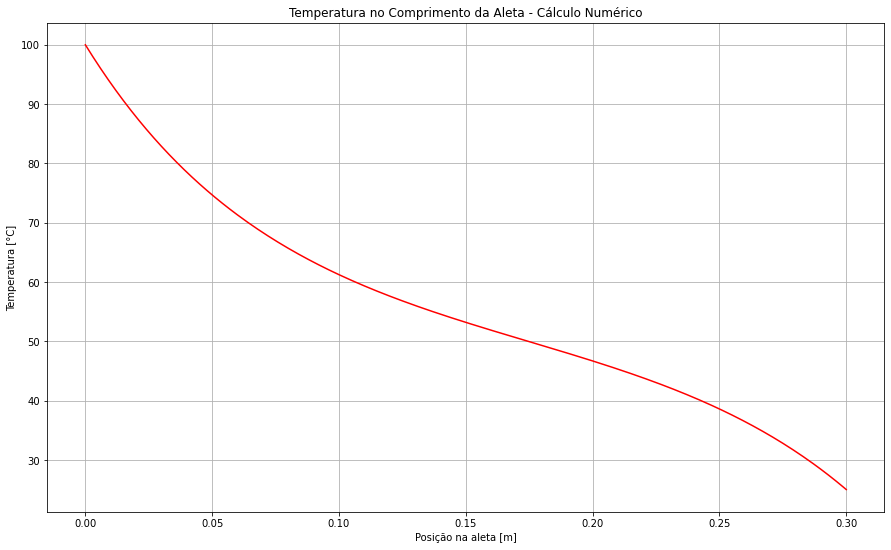

In [6]:
plt.figure(figsize=(15, 9))
plt.plot(np.arange(0, L+delta_x, delta_x), TM[t-1, :], 'r')
plt.title("Temperatura no Comprimento da Aleta - Cálculo Numérico")
plt.xlabel("Posição na aleta [m]")
plt.ylabel("Temperatura [°C]")
plt.grid()
plt.show()

O gráfico nos mostra o comportamento esperado com a temperatura ao longo da aleta, sabendo que a temperatura da base é 100 ℃ e a temperatura da extremidade é 25 ℃. 

3. Para  validar  os  resultados  obtidos  com  o  software  desenvolvido,  apresente  um  gráfico 
(𝑇𝑒𝑚𝑝𝑒𝑟𝑎𝑡𝑢𝑟𝑎×𝑝𝑜𝑠𝑖çã𝑜)  para  o  comportamento analítico  da  temperatura  na  aleta  usando  as 
mesmas condições definidas no item anterior.

Para isso vamos usar a equação do comportamento analítico da aleta unidimensional com temperatura especificada:
$$\frac{T(x)-T_{\infty}}{T_{b}-T_{\infty}} = \left ( \frac{\theta _{L}}{\theta _{b}} \right )\cdot \frac{ senh\left ( mx \right ) + senh\left ( m \left ( L-x \right ) \right )}{senh\left ( mL \right )}$$

Sabemos que $T(L) = 25  ℃$, que $\theta_{L} = T_{L} - T_{\infty}$ e que $\theta_{b} = T_{b} - T_{\infty}$

In [7]:
# Lista para armazenar os valores de temperatura calculados.
lista_temp_analitica = []

m = sqrt((h * P) / (k * Atr))

for x in np.linspace(0, L, passos):
    num = ((TL - Tinf) / (Tb - Tinf)) * sinh(m * x) + sinh(m * (L - x))
    den = sinh(m * L)
    dis_temp = num / den
    teta_L = dis_temp * (Tb - Tinf)
    Tl = teta_L + Tinf
    lista_temp_analitica.append(Tl)

- Plotando o gráfico da temperatura na aleta calculada analiticamente

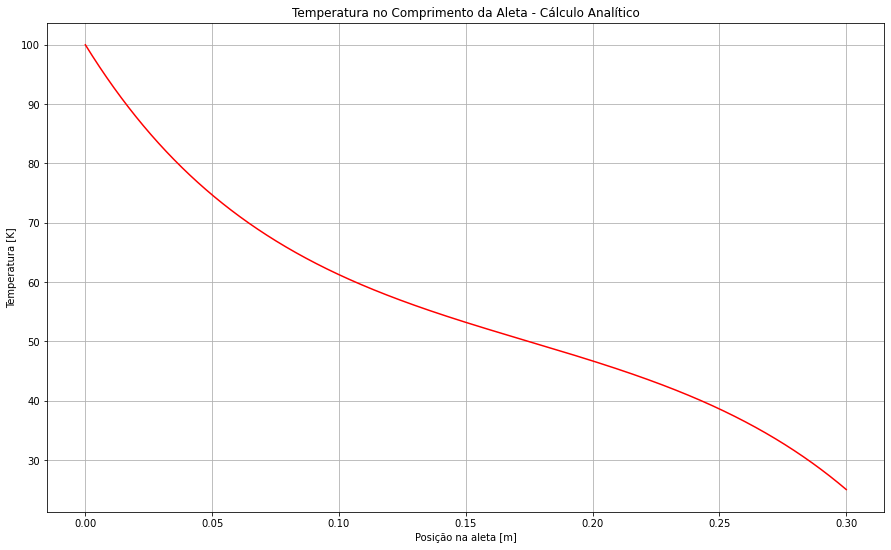

In [8]:
plt.figure(figsize=(15, 9))
plt.plot(np.linspace(0, L, passos), lista_temp_analitica, 'r')
plt.title("Temperatura no Comprimento da Aleta - Cálculo Analítico")
plt.xlabel("Posição na aleta [m]")
plt.ylabel("Temperatura [K]")
plt.grid()
plt.show()

- Validando os resultados

Para validar os resultados vamos plotar os gráficos juntos, assim há uma comparação mais direta entre os resultados.

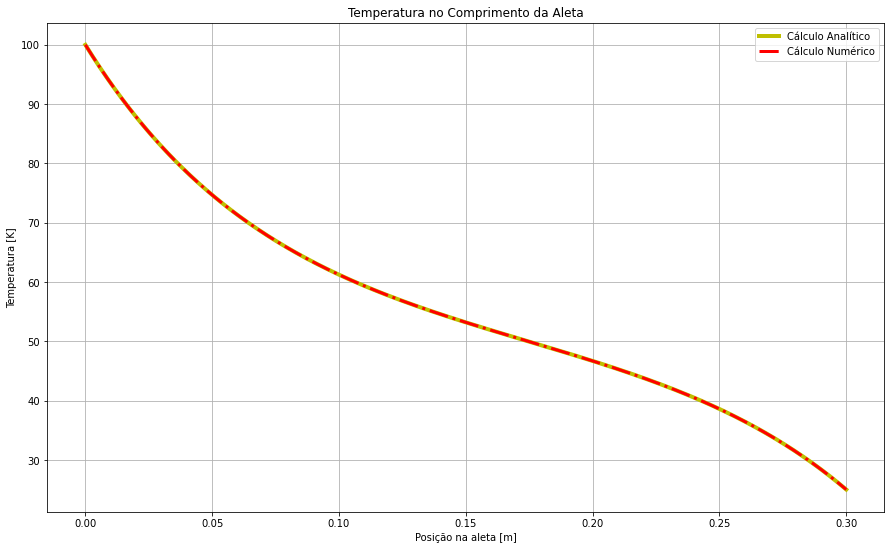

In [9]:
plt.figure(figsize=(15, 9))
plt.plot(np.linspace(0, L, passos), lista_temp_analitica, 'y', linewidth=4, label='Cálculo Analítico')
plt.plot(np.arange(0, L+delta_x, delta_x), TM[t-1, :], 'r-.',linewidth=3, label='Cálculo Numérico')
plt.title("Temperatura no Comprimento da Aleta")
plt.xlabel("Posição na aleta [m]")
plt.ylabel("Temperatura [K]")
plt.legend()
plt.grid()
plt.show()

Percebemos, então que ambos os gráficos são iguais, o que indica que o cálculo numérico utilizado com a tolerância aplicada está correto, portanto, **validado**.

### Finalizando:

Para completar a **APS3**, uma vez que já possuímos a validação de que o modelo numérico funciona, podemos criar uma função que receba todas as variáveis iniciais para devolver ambos os gráficos (cálculo numérico e analítico) do ensaio em questão.

A função recebe o nome de **calcula_temperatura_x_posicao** e recebe como argumentos:
- densidade do material [$kg/m^3$] - *ro*
- calor específico [$J/kgK$] - *c*
- condutividade térmica [$W/mK$] - *k*
- coeficiente de transferência por convecção [$W/m^2K$] - *h*
- temperatura do fluido [$°C$] - *Tinf*
- temperatura da base [$°C$] - *Tb*
- temperatura especificada da extremidade [$°C$] - *TL*
- raio [$m$] - *r*
- comprimento [$m$] - *L*
- $\delta x$ [$m$] - *delta_x*
- tempo total de simulação [$s$] - *tempo*

In [12]:
def calcula_temperatura_x_posicao(ro, c, k, h, Tinf, Tb, TL, r, L, delta_x, tempo):
    erro = 1
    t = 1

    P = 2 * pi * r
    Atr = pi * r**2

    n = int(L / delta_x) + 1

    delta_t = (delta_x**2 / ((k / (ro * c)) * (h * P * delta_x**2 / (k * Atr) + 2))) * 0.9  # "*0.9" para ser menor que o valor calculado

    passos = len(np.arange(0, tempo, delta_t))
    
    m = sqrt((h * P) / (k * Atr))


    # Gerando a matriz com as condições de temperatura expecificadas
    TM = np.zeros((passos, n))
    TM[:, 0] = Tb
    TM[:, n - 1] = TL

    # Cálculo numérico:
    for l in range(0, passos - 1):
        for i in range(1, n - 1):
            termo_1 = (TM[l, i+1] - 2 * TM[l, i] + TM[l, i-1]) / delta_x**2
            termo_2 = (h * P * (TM[l, i] - Tinf)) / (k * Atr)
            TM[l+1, i] = TM[l, i] + ((k * delta_t * (termo_1 - termo_2)) / (ro * c))

        erro = np.amax(abs((TM[l+1, 1:-1] - TM[l, 1:-1]) / TM[l+1, 1:-1]))  # Cálculo do erro
        if erro <= tol:
            print('Convergiu!')
            t = l
            break

    if(erro > tol):
        t = passos
        print("|  O número de iterações não foi suficiente para alcançar a tolerância exigida.")
        print(f"|  O erro calculado foi: {0}", erro)
        print("|  Aumente o tempo de execução para diminuir o erro.")

    
    # Lista para armazenar os valores de temperatura calculados.
    lista_temp_analitica = []

    # Cálculo Analítico:
    for x in np.linspace(0, L, passos):
        num = ((TL - Tinf) / (Tb - Tinf)) * sinh(m * x) + sinh(m * (L - x))
        den = sinh(m * L)
        dis_temp = num / den
        teta_L = dis_temp * (Tb - Tinf)
        Tl = teta_L + Tinf
        lista_temp_analitica.append(Tl)

    plt.figure(figsize=(15, 9))
    plt.plot(np.arange(0, L+delta_x, delta_x), TM[t-1, :], 'r', linewidth=3)
    plt.title("Temperatura no Comprimento da Aleta - Cálculo Numérico")
    plt.xlabel("Posição na aleta [m]")
    plt.ylabel("Temperatura [°C]")
    plt.grid()
    
    plt.figure(figsize=(15, 9))
    plt.plot(np.linspace(0, L, passos), lista_temp_analitica, 'lightblue', linewidth=3)
    plt.title("Temperatura no Comprimento da Aleta - Cálculo Analítico")
    plt.xlabel("Posição na aleta [m]")
    plt.ylabel("Temperatura [K]")
    plt.grid()

    plt.show()

Com a função criada, basta modificar os parâmetros abaixo para a necessidade do ensaio!

Convergiu!


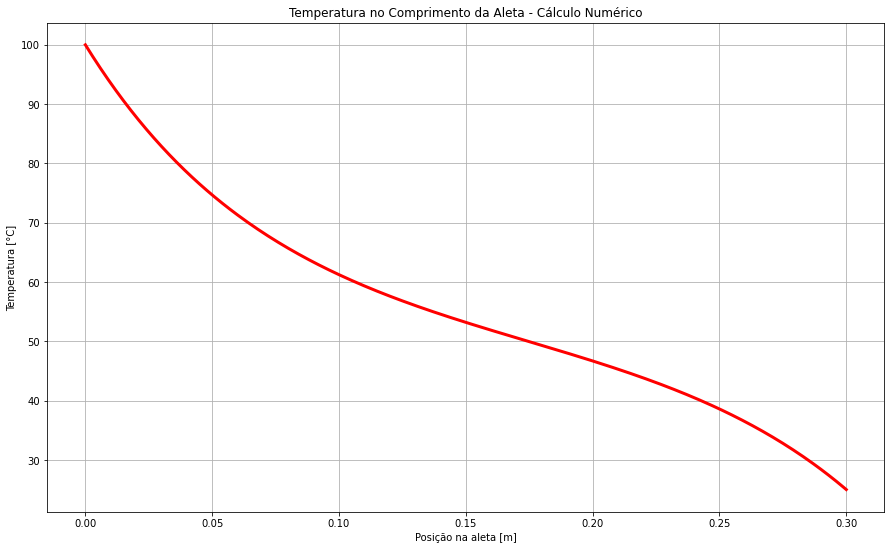

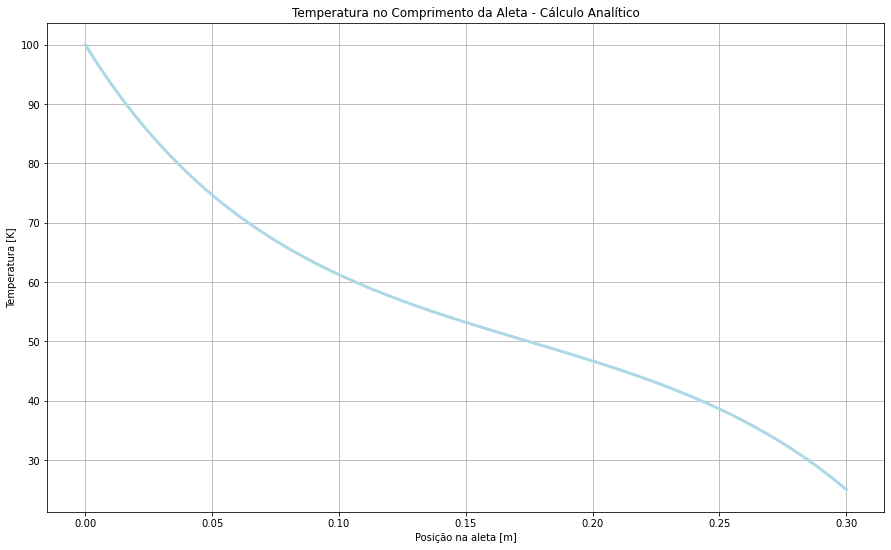

In [13]:
calcula_temperatura_x_posicao(ro, c, k, h, Tinf, Tb, TL, r, L, delta_x, tempo)